## Problem5

A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models.

In [80]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

dt = pd.read_csv("SAT_GPA.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

dt.describe()



,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


In [81]:
dt.shape

(200, 2)

In [82]:
dt.head()

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6


<AxesSubplot:xlabel='GPA', ylabel='Density'>

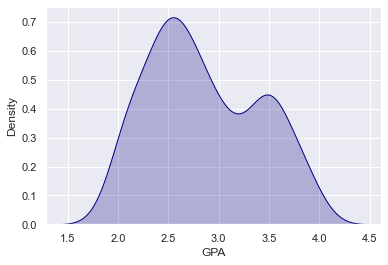

In [83]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes
import seaborn as sns
sns.set()

#plt.bar(height = dt['GPA'], x = np.arange(100, 1100, 100))

sns.kdeplot(data=dt,x= dt['GPA'],fill=True,color="navy")

(array([23., 14., 34., 28., 25., 14.,  9., 28., 11., 14.]),
 array([2.  , 2.19, 2.38, 2.57, 2.76, 2.95, 3.14, 3.33, 3.52, 3.71, 3.9 ]),
 <BarContainer object of 10 artists>)

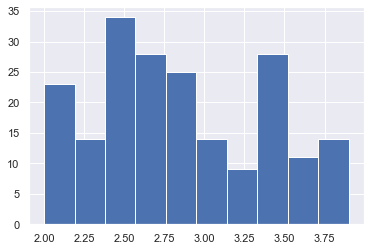

In [84]:
plt.hist(dt['GPA']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x1f93af8a9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f93af91130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f93af8aeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f93af7a130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f93af7a1f0>],
 'means': []}

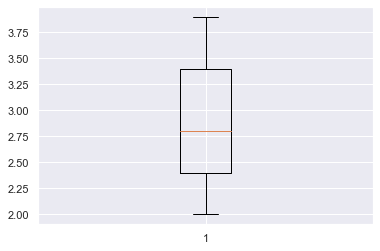

In [85]:
plt.boxplot(dt['GPA']) #boxplot

<AxesSubplot:xlabel='SAT_Scores', ylabel='Density'>

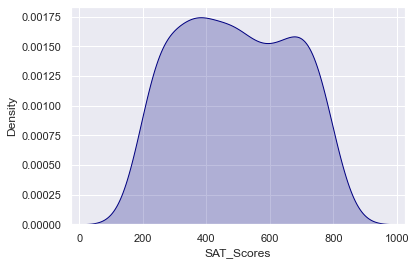

In [86]:
sns.kdeplot(data=dt,x= dt['SAT_Scores'],fill=True,color="navy")

(array([26., 17., 21., 19., 24., 17., 17., 20., 20., 19.]),
 array([202. , 261.5, 321. , 380.5, 440. , 499.5, 559. , 618.5, 678. ,
        737.5, 797. ]),
 <BarContainer object of 10 artists>)

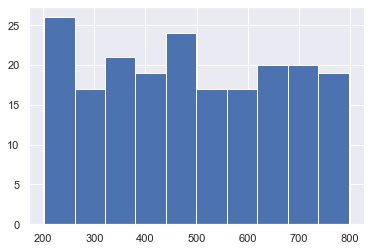

In [87]:
plt.hist(dt['SAT_Scores']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x1f93af4c0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f93af4c7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f93af51d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1f93af4cf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f93b2b62e0>],
 'means': []}

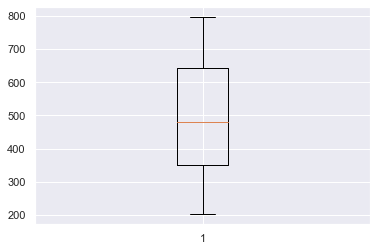

In [88]:
plt.boxplot(dt['SAT_Scores']) #boxplot

### Bivariate

In [89]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#dt=scaler.fit_transform(dt)

In [90]:
#dt=pd.DataFrame(dt)
#dt.columns= ['SAT_Scores','GPA']

In [91]:
dt.head()

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6


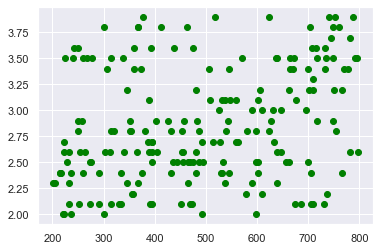

In [92]:
# Scatter plot
plt.scatter(x = dt['SAT_Scores'], y = dt['GPA'], color = 'green')


In [93]:
dt.columns

Index(['SAT_Scores', 'GPA'], dtype='object')

In [94]:
# correlation
np.corrcoef(dt['GPA'], dt['SAT_Scores']) 

array([[1.        , 0.29353828],
       [0.29353828, 1.        ]])

In [95]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(dt['GPA'], dt['SAT_Scores'])[0, 1]
cov_output



27.77779396984924

In [96]:
dt

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6
...,...,...
195,509,3.1
196,466,2.5
197,673,3.5
198,741,3.9


In [97]:
# dt.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('GPA ~ SAT_Scores', data = dt).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.46e-05
Time:                        14:50:16   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
SAT_Scores     0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

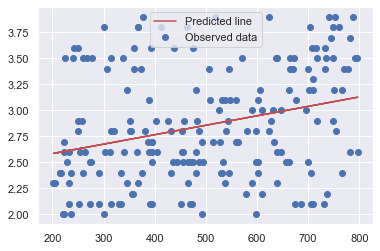

In [98]:
pred1 = model.predict(pd.DataFrame(dt['SAT_Scores']))

# Regression Line
plt.scatter(dt.SAT_Scores, dt.GPA)
plt.plot(dt.SAT_Scores, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [99]:
# Error calculation
res1 = dt.GPA - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

0.5159457227723684

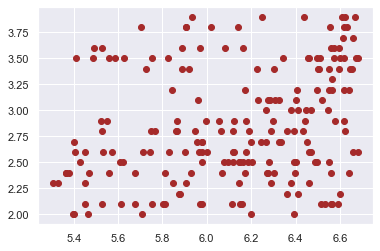

In [100]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(dt['SAT_Scores']), y = dt['GPA'], color = 'brown')

In [101]:
np.corrcoef(np.log(dt.SAT_Scores), dt.GPA) #correlation

array([[1.        , 0.27771976],
       [0.27771976, 1.        ]])

In [102]:
model2 = smf.ols('GPA ~ np.log(SAT_Scores)', data = dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.55
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           6.85e-05
Time:                        14:50:17   Log-Likelihood:                -152.42
No. Observations:                 200   AIC:                             308.8
Df Residuals:                     198   BIC:                             315.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4796      0.584      0.822      0.412      -0.672       1.631
np.log(SAT_Scores)     0.3868      0.095      4.068      0.000       0.199       0.574
==============================================================================
Omnibus:                       15.866   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.435
Skew:                           0.320   Prob(JB):                       0.0147
Kurtosis:                       2.224   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

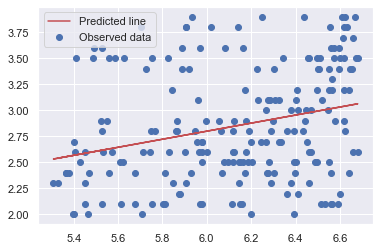

In [103]:
pred2 = model2.predict(pd.DataFrame(dt['SAT_Scores']))

# Regression Line
plt.scatter(np.log(dt.SAT_Scores), dt.GPA)
plt.plot(np.log(dt.SAT_Scores), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [104]:
# Error calculation
res2 = dt.GPA - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

0.518490410108067

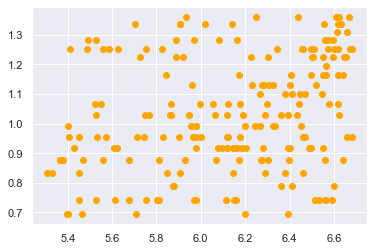

In [124]:
#### Exponential transformation
# x = waist; y = log(at)

#plt.scatter(x = dt['SAT_Scores'], y = np.log(dt['GPA']), color = 'orange')
plt.scatter(x = np.log(dt['SAT_Scores']), y = np.log(dt['GPA']), color = 'orange')

In [106]:
np.corrcoef(dt.SAT_Scores, np.log(dt.GPA)) #correlation

array([[1.        , 0.29408419],
       [0.29408419, 1.        ]])

In [107]:
model3 = smf.ols('np.log(GPA) ~ SAT_Scores', data = dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.75
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.37e-05
Time:                        14:50:18   Log-Likelihood:                 58.615
No. Observations:                 200   AIC:                            -113.2
Df Residuals:                     198   BIC:                            -106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8727      0.038     22.745      0.000       0.797       0.948
SAT_Scores     0.0003   7.35e-05      4.330      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.046   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.816
Skew:                           0.066   Prob(JB):                       0.0900
Kurtosis:                       2.251   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
pred3 = model3.predict(pd.DataFrame(dt['SAT_Scores']))
pred3_at = np.exp(pred3)
pred3_at

0      2.555671
1      2.562188
2      3.007152
3      2.878816
4      2.721951
         ...   
195    2.814476
196    2.776210
197    2.965323
198    3.030217
199    2.599158
Length: 200, dtype: float64

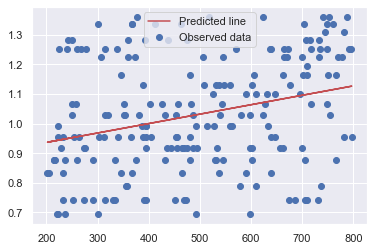

In [109]:
# Regression Line
plt.scatter(dt.SAT_Scores, np.log(dt.GPA))
plt.plot(dt.SAT_Scores, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [110]:
# Error calculation
res3 = dt.GPA - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0.5175875893834133

In [111]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores*SAT_Scores)', data = dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.23
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           5.95e-05
Time:                        14:50:18   Log-Likelihood:                 59.448
No. Observations:                 200   AIC:                            -112.9
Df Residuals:                     197   BIC:                            -103.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0056      0.110      9.112      0.000       0.788       1.223
SAT_Scores                    -0.0003      0.000     -0.607      0.545      -0.001       0.001
I(SAT_Scores * SAT_Scores)  6.142e-07   4.79e-07      1.284      0.201    -3.3e-07    1.56e-06
==============================================================================
Omnibus:                        8.598   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.118
Skew:                           0.046   Prob(JB):                        0.128
Kurtosis:                       2.303   Cond. No.                     2.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
pred4 = model4.predict(pd.DataFrame(dt))
pred4_at = np.exp(pred4)
pred4_at

0      2.641946
1      2.641231
2      3.040712
3      2.837523
4      2.685642
         ...   
195    2.762567
196    2.726333
197    2.966451
198    3.085089
199    2.641076
Length: 200, dtype: float64

In [113]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = dt.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = dt.iloc[:, 1].values

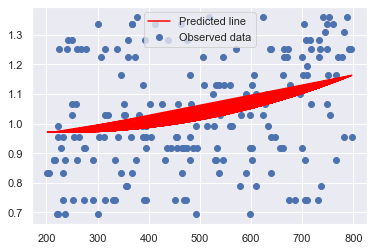

In [114]:
plt.scatter(dt.SAT_Scores, np.log(dt.GPA))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [115]:
# Error calculation
res4 = dt.GPA - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

0.5144912487746158

In [116]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}

table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,0.515946
1,Log model,0.518490
2,Exp model,0.517588
3,Poly model,0.514491


In [117]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(dt, test_size = 0.2)

finalmodel = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores*SAT_Scores)', data = dt).fit()
finalmodel.summary()
# Simple Linear Regression



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.23
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           5.95e-05
Time:                        14:50:18   Log-Likelihood:                 59.448
No. Observations:                 200   AIC:                            -112.9
Df Residuals:                     197   BIC:                            -103.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0056      0.110      9.112      0.000       0.788       1.223
SAT_Scores                    -0.0003      0.000     -0.607      0.545      -0.001       0.001
I(SAT_Scores * SAT_Scores)  6.142e-07   4.79e-07      1.284      0.201    -3.3e-07    1.56e-06
==============================================================================
Omnibus:                        8.598   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.118
Skew:                           0.046   Prob(JB):                        0.128
Kurtosis:                       2.303   Cond. No.                     2.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

55     1.143076
186    0.973376
140    0.987513
66     0.976617
54     1.089516
193    1.007007
65     1.078450
163    1.132196
25     0.976617
134    1.066467
129    0.985365
154    1.105112
185    0.985936
102    1.130940
77     0.977225
61     0.980112
142    0.970922
173    0.995581
7      0.979521
28     0.996828
15     0.970917
2      1.112092
22     0.970906
18     1.082078
117    1.152301
115    1.000482
195    1.016160
78     1.054284
196    1.002957
136    1.152301
69     0.978808
87     0.972725
9      1.022006
46     0.982172
86     1.073371
105    1.003805
40     0.973866
160    1.038786
184    1.134090
175    0.998886
dtype: float64

In [119]:
# Model Evaluation on Test data
test_res = test.GPA - test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

1.8978740593378738

In [120]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred

107    0.971302
64     1.123504
34     0.971015
123    1.066952
71     0.999678
         ...   
85     1.026716
52     1.017843
124    1.105687
98     1.162453
145    1.128441
Length: 160, dtype: float64

In [121]:
# Model Evaluation on train data
train_res = train.GPA -train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse



1.8933775663952468

conclusion:
    The GPA and SAT scores are not linearly correleated. We cannot fit a strong R squared linear model